In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Análise dos Dados de Atividade Física - FitBit

## Quais características mais influenciam as calorias gastas?

Para responder essa pergunta, primeiro vou ter que criar um modelo.

### Regressão Linear
A gente usa, geralmente, para prever uma coluna de número.

### No caso do FitBit, qual a minha variável alvo?

As calorias gastas, que é uma variável numérica.
Se é uma variável numérica, o modelo de Regressão Linear responde bem.

Vamos analisar como as diferentes distâncias percorridas em vários níveis de atividade 
(moderada, leve e sedentária) influenciam o gasto calórico diário.

In [5]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Identificar variáveis independentes (X) e variável dependente (y)

X = Distâncias percorridas (ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance)
y = Calorias gastas

# Preparação dos Dados

Precisamos converter a coluna de data para o formato datetime e verificar se existem outros pré-processamentos necessários antes de continuar.

In [7]:
df = df[["ActivityDate", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance"]]

In [11]:
df.head()

,ActivityDate,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
0,4/12/2016,0.55,6.06,0.0
1,4/13/2016,0.69,4.71,0.0
2,4/14/2016,0.40,3.91,0.0
3,4/15/2016,1.26,2.83,0.0
4,4/16/2016,0.41,5.04,0.0


In [ ]:
# Converter a coluna ActivityDate para datetime
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df.head()

C:\Users\luana\AppData\Local\Temp\ipykernel_4820\3438531016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])


,ActivityDate,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
0,2016-04-12,0.55,6.06,0.0
1,2016-04-13,0.69,4.71,0.0
2,2016-04-14,0.40,3.91,0.0
3,2016-04-15,1.26,2.83,0.0
4,2016-04-16,0.41,5.04,0.0


In [13]:
# Verificar informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ActivityDate              940 non-null    datetime64[ns]
 1   ModeratelyActiveDistance  940 non-null    float64       
 2   LightActiveDistance       940 non-null    float64       
 3   SedentaryActiveDistance   940 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 29.5 KB


In [14]:
# Vamos readicionar a coluna de Calories que será nossa variável alvo (y)
df_completo = pd.read_csv('dailyActivity_merged.csv')
df['Calories'] = df_completo['Calories']
df.head()

C:\Users\luana\AppData\Local\Temp\ipykernel_4820\1927444121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calories'] = df_completo['Calories']


,ActivityDate,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,Calories
0,2016-04-12,0.55,6.06,0.0,1985
1,2016-04-13,0.69,4.71,0.0,1797
2,2016-04-14,0.40,3.91,0.0,1776
3,2016-04-15,1.26,2.83,0.0,1745
4,2016-04-16,0.41,5.04,0.0,1863


In [20]:
# Definir as features para o modelo de regressão linear
features = ['ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']
print(features)

['ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']


# Feature Engineering

Neste exemplo simples, estamos usando as distâncias percorridas em diferentes níveis de intensidade como features. Em uma análise mais completa, poderíamos considerar:

1. Dia da semana (pessoas podem ser mais ativas nos fins de semana)
2. Total de minutos ativos
3. Proporção entre atividade e sedentarismo
4. Interações entre variáveis

In [21]:
# Definir X (features) para o modelo
X = df[features]
X.head()

,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
0,0.55,6.06,0.0
1,0.69,4.71,0.0
2,0.40,3.91,0.0
3,1.26,2.83,0.0
4,0.41,5.04,0.0


In [22]:
# Definir y (target) para o modelo
y = df['Calories']
y.head()

0    1985
1    1797
2    1776
3    1745
4    1863
Name: Calories, dtype: int64

# importar o modelo

In [23]:
from sklearn.linear_model import LinearRegression

## Instaciar o modelo
Criar uma variavel com o nome do modelo

In [24]:
modelo = LinearRegression()

# Separar o X e y em 4 partes

## X_train
Base de treino que o modelo vai aprender

## X_test
Base de teste que o modelo vai ver se errou ou não

## y_train
Base de treino que o modelo vai aprender

## y_test
Base de teste que o modelo vai ver se errou ou não

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Separação dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
X_train.shape

(705, 3)

In [28]:
X_test.shape

(235, 3)

In [29]:
668+223

891

In [30]:
668/891

0.7497194163860831

-

# Treinamento do Modelo de Regressão Linear

Agora vamos descobrir os parâmetros do modelo (os coeficientes) que melhor relacionam as distâncias percorridas com as calorias gastas.

## Modelo de Regressão Linear para Calorias

Calorias = a1 × ModeratelyActiveDistance + a2 × LightActiveDistance + a3 × SedentaryActiveDistance + b

Onde:
- a1, a2, a3 são os coeficientes para cada tipo de distância
- b é o intercepto (valor base de calorias gastas mesmo sem movimento)

Vamos treinar o modelo para descobrir estes valores.

In [31]:
modelo.fit(X_train, y_train)

LinearRegression()

# Coeficientes do modelo

Estes valores mostram a influência de cada tipo de distância no gasto calórico:
- Quanto maior o valor, mais essa variável influencia as calorias gastas

In [32]:
print(modelo.coef_)

[ 106.86225044  156.01913195 1204.18189744]


# Intercepto do modelo

Este é o valor base de calorias que seria gasto mesmo se todas as distâncias fossem zero (metabolismo basal estimado pelo modelo)

In [33]:
print(modelo.intercept_)

1720.8319969357067


# Equação completa do modelo de regressão
print(f"Calorias = {modelo.coef_[0]:.2f} × ModeratelyActiveDistance + {modelo.coef_[1]:.2f} × LightActiveDistance + {modelo.coef_[2]:.2f} × SedentaryActiveDistance + {modelo.intercept_:.2f}")

# Y_pred

ele vai ser predição com base na base de teste

In [34]:
y_pred = modelo.predict(X_test)
print(y_pred)

[2633.3514814  2228.8985445  1737.99410136 2829.01658112 2858.2113418
 1779.64903817 1988.26577582 2486.63850934 2031.31007101 2628.86337168
 2477.26796601 2597.61661378 1901.81418479 2074.99542349 2010.64284674
 2618.62590788 1720.83199694 2138.96328098 2269.2283789  2546.68538106
 2396.22349345 2432.72799191 2224.77379612 2633.92857492 2442.36691716
 2272.50137323 2711.44346185 2126.48172513 2007.46748639 2377.6725484
 2772.46431451 2308.51110963 1720.83199694 1937.69858812 1727.07276207
 2273.13971809 3032.95287284 1720.83199694 2636.36480853 2193.56996229
 2187.62834873 2310.94745799 2413.55695173 2589.73025737 2323.64276192
 1720.83199694 2305.72034424 2068.75466416 2351.93988025 2489.0657519
 2056.27314551 1720.83199694 2482.88613145 2554.6549381  2358.95027042
 2692.87383661 2588.61887013 2073.43523366 2416.46330388 2600.48028409
 2121.33080709 2665.9445291  2513.40917535 2335.61138991 2282.56477095
 1968.90242195 2719.76024769 2335.54738575 2342.01095104 1968.83827489
 2535.251

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Validação cruzada
cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print(f"RMSE com validação cruzada: {rmse_cv:.2f}")

# Modelo baseline (média)
y_pred_baseline = np.full_like(y_test, y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
print(f"RMSE do modelo baseline: {rmse_baseline:.2f}")

# Calcular métricas de erro do modelo principal
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculando RMSE manualmente
r2 = r2_score(y_test, y_pred)

print(f"\nErro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Calcular melhoria percentual
if rmse_baseline > 0:
    melhoria = ((rmse_baseline - rmse) / rmse_baseline * 100)
    print(f"Melhoria percentual sobre o baseline: {melhoria:.2f}%")

# Criar um dataframe para análise de erros
error_df = pd.DataFrame({
    'Real': y_test, 
    'Previsto': y_pred, 
    'Erro': y_test - y_pred,
    'Erro_Abs': np.abs(y_test - y_pred),
    'Erro_Percentual': np.abs((y_test - y_pred) / y_test) * 100
})

# Identificar onde o modelo erra mais
print("\nMaiores erros percentuais:")
print(error_df.sort_values('Erro_Percentual', ascending=False).head())

RMSE com validação cruzada: 691.82
RMSE do modelo baseline: 700.34

Erro Quadrático Médio (MSE): 407833.47
Raiz do Erro Quadrático Médio (RMSE): 638.62
Coeficiente de Determinação (R²): 0.1678
Melhoria percentual sobre o baseline: 8.81%

Maiores erros percentuais:
     Real     Previsto         Erro     Erro_Abs  Erro_Percentual
30      0  1720.831997 -1720.831997  1720.831997              inf
710   928  2076.747912 -1148.747912  1148.747912       123.787490
215  1364  2580.497450 -1216.497450  1216.497450        89.186030
331  1377  2486.522512 -1109.522512  1109.522512        80.575346
31   1432  2549.293579 -1117.293579  1117.293579        78.023295


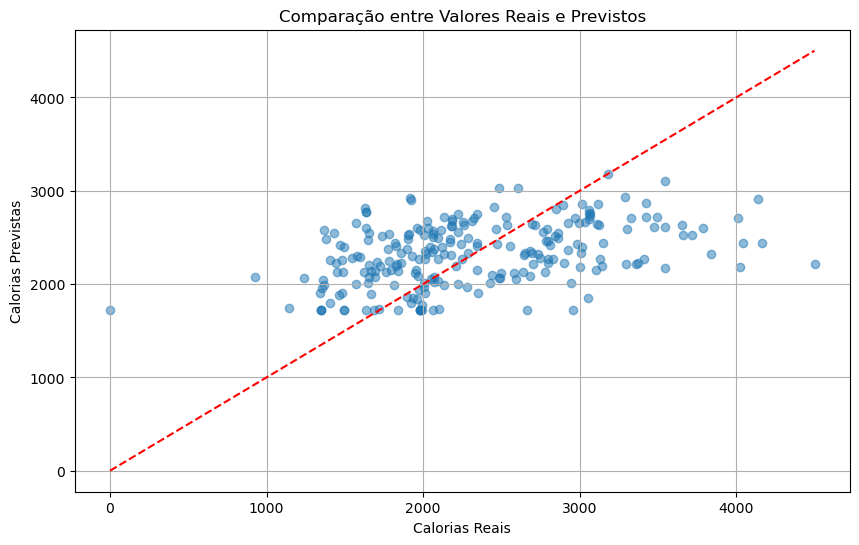

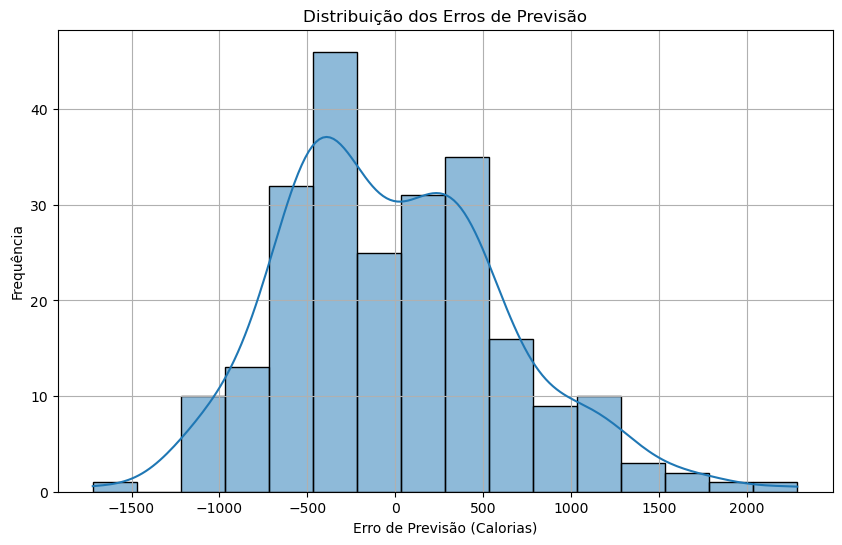

In [45]:
# Visualização dos resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um dataframe com valores reais e previstos
results_df = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred
})

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Calorias Reais')
plt.ylabel('Calorias Previstas')
plt.title('Comparação entre Valores Reais e Previstos')
plt.grid(True)
plt.show()

# Histograma dos erros
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Erro de Previsão (Calorias)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Erros de Previsão')
plt.grid(True)
plt.show()

# Conclusões e Próximos Passos

## O que aprendemos
1. Identificamos o impacto de diferentes níveis de atividade (moderada, leve, sedentária) no gasto calórico
2. Construímos um modelo de regressão linear para prever calorias gastas
3. Avaliamos a precisão do modelo usando métricas estatísticas

## Melhorias possíveis
1. Incluir mais variáveis como VeryActiveDistance, minutos de atividade, etc.
2. Considerar fatores temporais (dia da semana, horário)
3. Normalizar as variáveis para melhorar a performance do modelo
4. Testar outros algoritmos além da regressão linear
5. Tratar outliers que possam estar afetando a qualidade do modelo

## Aplicação prática
Este modelo pode ser usado para estimar o gasto calórico baseado nos padrões de atividade, 
ajudando usuários a entender melhor a relação entre movimento e gasto energético.

Prox aula

- Erro
- Nulos

Entrando em mais detalhes

Matriz Confusão
RMSE

In [46]:
# Código completo do modelo de regressão linear para dados do FitBit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados e selecionar colunas
df = pd.read_csv('dailyActivity_merged.csv')
df = df[["ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance", "Calories"]]

# Definir features e target
features = ['ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']
X = df[features]
y = df['Calories']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Imprimir coeficientes
print("Coeficientes:")
for feature, coef in zip(features, modelo.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")

# Fazer previsões e avaliar
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculando RMSE manualmente
r2 = r2_score(y_test, y_pred)
print(f"\nRaiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Coeficientes:
ModeratelyActiveDistance: 106.8623
LightActiveDistance: 156.0191
SedentaryActiveDistance: 1204.1819
Intercepto: 1720.8320

Raiz do Erro Quadrático Médio (RMSE): 638.62
Coeficiente de Determinação (R²): 0.1678
